In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/shl-intern-hiring-assessment-2025/dataset/audios/test/audio_49.wav
/kaggle/input/shl-intern-hiring-assessment-2025/dataset/audios/test/audio_67_1.wav
/kaggle/input/shl-intern-hiring-assessment-2025/dataset/audios/test/audio_90.wav
/kaggle/input/shl-intern-hiring-assessment-2025/dataset/audios/test/audio_77.wav
/kaggle/input/shl-intern-hiring-assessment-2025/dataset/audios/test/audio_20_1.wav
/kaggle/input/shl-intern-hiring-assessment-2025/dataset/audios/test/audio_66.wav
/kaggle/input/shl-intern-hiring-assessment-2025/dataset/audios/test/audio_54.wav
/kaggle/input/shl-intern-hiring-assessment-2025/dataset/audios/test/audio_106_1.wav
/kaggle/input/shl-intern-hiring-assessment-2025/dataset/audios/test/audio_42.wav
/kaggle/input/shl-intern-hiring-assessment-2025/dataset/audios/test/audio_81.wav
/kaggle/input/shl-intern-hiring-assessment-2025/dataset/audios/test/audio_72.wav
/kaggle/input/shl-intern-hiring-assessment-2025/dataset/audios/test/audio_107.wav
/kaggle/input/shl-in

In [2]:
BASE_PATH = "/kaggle/input/shl-intern-hiring-assessment-2025/dataset/"

TRAIN_CSV = BASE_PATH + "csvs/train.csv"
TEST_CSV  = BASE_PATH + "csvs/test.csv"

TRAIN_AUDIO_DIR = BASE_PATH + "audios/train/"
TEST_AUDIO_DIR  = BASE_PATH + "audios/test/"



In [3]:
# Loading the csv files 
import pandas as pd

train_df = pd.read_csv(TRAIN_CSV)
test_df = pd.read_csv(TEST_CSV)

print(train_df.head())
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print(train_df.columns)


    filename  label
0  audio_173    3.0
1  audio_138    3.0
2  audio_127    2.0
3   audio_95    2.0
4   audio_73    3.5
Train shape: (409, 2)
Test shape: (197, 1)
Index(['filename', 'label'], dtype='object')


In [4]:
#check on csv columns
print(train_df.head())
print(train_df["filename"].iloc[0])



    filename  label
0  audio_173    3.0
1  audio_138    3.0
2  audio_127    2.0
3   audio_95    2.0
4   audio_73    3.5
audio_173


In [5]:

# loading audio file
import os
import librosa

sample_file = train_df.iloc[0]["filename"]

# Add .wav if missing
if not sample_file.endswith(".wav"):
    sample_file = sample_file + ".wav"

audio_path = os.path.join(TRAIN_AUDIO_DIR, sample_file)

audio, sr = librosa.load(audio_path, sr=16000)

print("Audio loaded successfully")
print("Shape:", audio.shape)
print("Sample rate:", sr)



/tmp/ipykernel_13/1628521839.py:13: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(audio_path, sr=16000)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Audio loaded successfully
Shape: (961195,)
Sample rate: 16000


In [6]:
# feature extraction function
import numpy as np
import librosa

def extract_mfcc(audio_path, sr=16000, n_mfcc=40):
    y, sr = librosa.load(audio_path, sr=sr)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return np.mean(mfcc, axis=1)  # (40,)


In [7]:
# check on format 
import os

TRAIN_AUDIO_DIR = "/kaggle/input/shl-intern-hiring-assessment-2025/dataset/audios/train"

for root, dirs, files in os.walk(TRAIN_AUDIO_DIR):
    print(root)
    print(files[:5])
    break
train_df.head()



/kaggle/input/shl-intern-hiring-assessment-2025/dataset/audios/train
['audio_49.wav', 'audio_77_2.wav', 'audio_90.wav', 'audio_77.wav', 'audio_66.wav']


,filename,label
0,audio_173,3.0
1,audio_138,3.0
2,audio_127,2.0
3,audio_95,2.0
4,audio_73,3.5


In [8]:

def extract_mfcc(audio_path, sr=16000, n_mfcc=40):
    y, sr = librosa.load(audio_path, sr=sr)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return np.mean(mfcc, axis=1)

# building training features

X_train = []
y_train = []

for _, row in train_df.iterrows():
    audio_path = os.path.join(TRAIN_AUDIO_DIR, row["filename"] + ".wav")
    mfcc_feat = extract_mfcc(audio_path)
    
    X_train.append(mfcc_feat)
    y_train.append(row["label"])

X_train = np.array(X_train)
y_train = np.array(y_train)

print(X_train.shape, y_train.shape)


/tmp/ipykernel_13/2854029715.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=sr)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipykernel_13/2854029715.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=sr)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipykernel_13/2854029715.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=sr)
/usr/local/lib/python3.11/dist-packages/librosa/core/a

(409, 40) (409,)


In [9]:
# Train regression model using random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

model = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

model.fit(X_tr, y_tr)


RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42)

In [10]:
# Training RMSE
train_preds = model.predict(X_train)
train_rmse = mean_squared_error(y_train, train_preds, squared=False)

print(f"Training RMSE: {train_rmse:.4f}")


Training RMSE: 0.4148


In [11]:
# check for validation RMSE score 
val_preds = model.predict(X_val)
val_rmse = mean_squared_error(y_val, val_preds, squared=False)

print(f"Validation RMSE: {val_rmse:.4f}")


Validation RMSE: 0.7359


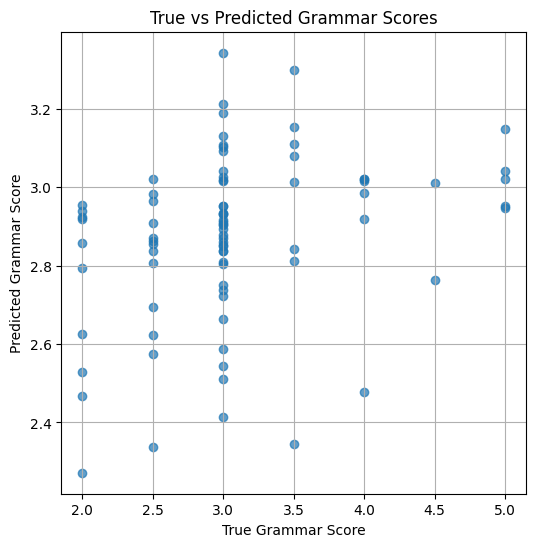

In [12]:
# Visualisation (True Vs Predicted)
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_val, val_preds, alpha=0.7)
plt.xlabel("True Grammar Score")
plt.ylabel("Predicted Grammar Score")
plt.title("True vs Predicted Grammar Scores")
plt.grid(True)
plt.show()


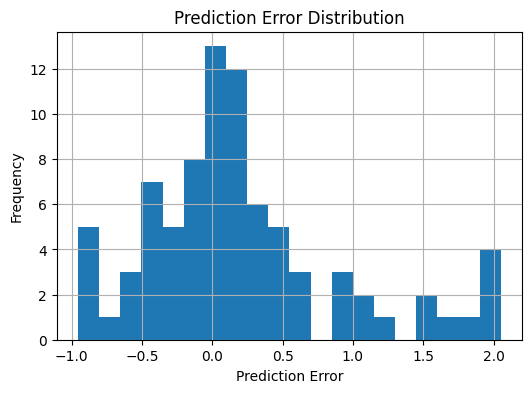

In [13]:
# Predict on test set visualisation 
errors = y_val - val_preds

plt.figure(figsize=(6,4))
plt.hist(errors, bins=20)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Prediction Error Distribution")
plt.grid(True)
plt.show()


In [14]:

X_test = []

for _, row in test_df.iterrows():
    audio_path = os.path.join(TEST_AUDIO_DIR, row["filename"] + ".wav")
    mfcc_feat = extract_mfcc(audio_path)
    X_test.append(mfcc_feat)

X_test = np.array(X_test)
print(X_test.shape)


/tmp/ipykernel_13/2854029715.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=sr)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipykernel_13/2854029715.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=sr)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipykernel_13/2854029715.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=sr)
/usr/local/lib/python3.11/dist-packages/librosa/core/a

(197, 40)


In [15]:
# submission file creation 
test_preds = model.predict(X_test)

submission = pd.DataFrame({
    "filename": test_df["filename"],
    "label": test_preds
})

submission_path = "/kaggle/working/submission.csv"
submission.to_csv(submission_path, index=False)

submission.head()


,filename,label
0,audio_141,3.455000
1,audio_114,2.660000
2,audio_17,2.933333
3,audio_76,2.850000
4,audio_156,2.795000
